In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Times New Roman']

Generating the data

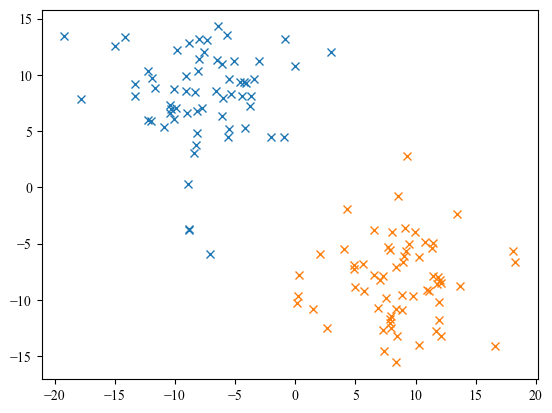

In [186]:
num_points = 128
test_data = np.zeros(shape=(num_points,2))

seperation_scale = 8
logit_scale = 2

test_data[:int(num_points/2), 0] = np.random.logistic(loc=-seperation_scale, scale=logit_scale, size=int(num_points/2))
test_data[:int(num_points/2), 1] = np.random.logistic(loc=seperation_scale, scale=logit_scale, size=int(num_points/2))
test_data[int(num_points/2):, 0] = np.random.logistic(loc=seperation_scale, scale=logit_scale, size=int(num_points/2))
test_data[int(num_points/2):, 1] = np.random.logistic(loc=-seperation_scale, scale=logit_scale, size=int(num_points/2))


plt.figure()
plt.plot(test_data[:int(num_points/2), 0], test_data[:int(num_points/2), 1], 'x')
plt.plot(test_data[int(num_points/2):, 0], test_data[int(num_points/2):, 1], 'x')

Clustering Class Definition

In [231]:
class ClusteringAgent:
    def __init__(self, k=2, data=None):
        self.k = k
        self.centroids = np.zeros((k,2))
        self.data = data
        self.centroids[:,0] = np.random.uniform(low=np.min(self.data[:,0]), high=np.max(self.data[:,0]), size=(self.k)) # Initial centroid x initialization
        self.centroids[:,1] = np.random.uniform(low=np.min(self.data[:,1]), high=np.max(self.data[:,1]), size=(self.k)) # Initial centroid y initialization
        self.data_max_dist = np.sqrt(np.float_power(np.max(self.data[:,0])-np.min(self.data[:,0]), 2)+np.float_power(np.max(self.data[:,1])-np.min(self.data[:,1]), 2))
        self.min_dist = self.data_max_dist
        if data is not None:
            self.clustered_points = np.resize(self.data, new_shape=(self.data.shape[0], 3))
            self.clustered_points[:,:-1] = self.data
            self.clustered_points[:,2] = 0
         
    def cluster(self):
        for idx, point in enumerate(self.clustered_points[:,:-1]):
            self.clustered_points[idx,2] = np.argmax(np.sqrt(np.float_power(self.centroids[:,0] - point[0], 2) + np.float_power(self.centroids[:,1] - point[1], 2)))
    
    def recenter(self):
        for i in range(self.k):
            cluster_indices = np.where(self.clustered_points[:,2]==i)[0]
            self.centroids[i,:] = np.mean(self.clustered_points[cluster_indices, :-1], axis=0)
                
                
    def fit(self, stopping_condition=0.01):
        last_change = 100
        change = 0
        while abs(change-last_change) > stopping_condition:
            last_centroid_pos = self.centroids.copy()
            self.cluster()
            self.recenter()
            last_change = change
            change = np.max(np.linalg.norm(last_centroid_pos - self.centroids, axis=0))
            print(change)

Usage

28.622933490186274
23.22346483112102
23.22346483112102


Text(0, 0.5, 'y')

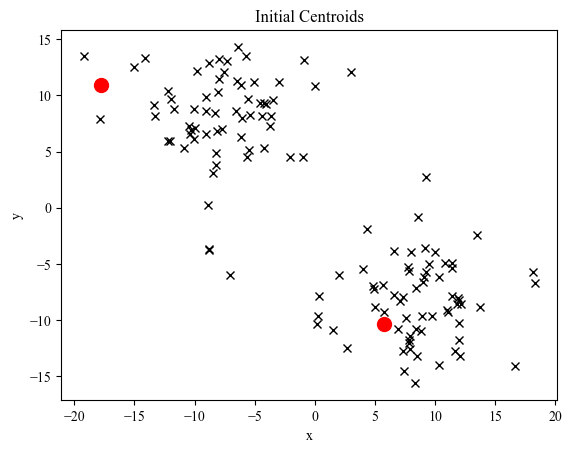

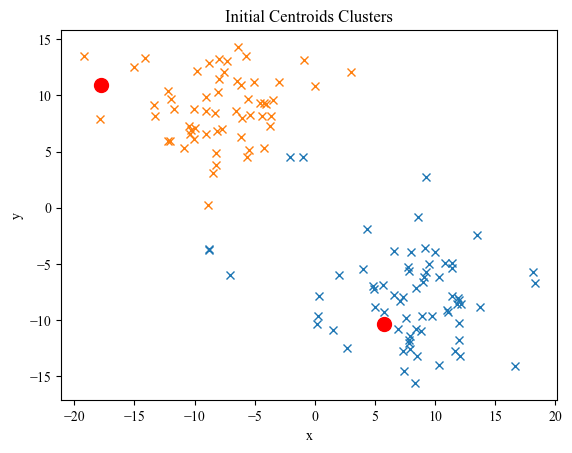

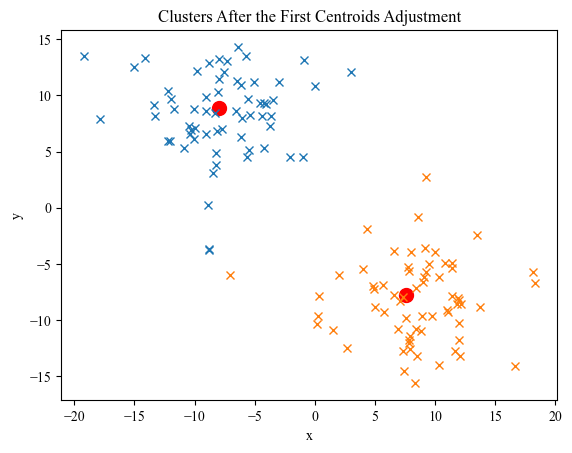

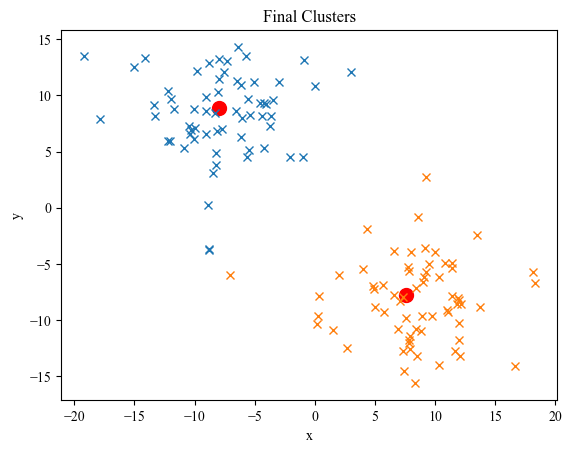

In [232]:
agent = ClusteringAgent(2, data=test_data)
agent.cluster()

plt.figure()
plt.plot(test_data[:int(num_points/2),0], test_data[:int(num_points/2),1], 'x', c='black')
plt.plot(test_data[int(num_points/2):,0], test_data[int(num_points/2):,1], 'x', c='black')
plt.scatter(x=agent.centroids[0,0], y=agent.centroids[0,1], s=100, c='r')
plt.scatter(x=agent.centroids[1,0], y=agent.centroids[1,1], s=100, c='r')
plt.title('Initial Centroids')
plt.xlabel('x')
plt.ylabel('y')

k0 = agent.clustered_points[np.where(agent.clustered_points[:,2]==0)[0]]
k1 = agent.clustered_points[np.where(agent.clustered_points[:,2]==1)[0]]

plt.figure()
plt.plot(k0[:,0], k0[:,1], 'x')
plt.plot(k1[:,0], k1[:,1], 'x')
plt.scatter(x=agent.centroids[0,0], y=agent.centroids[0,1], s=100, c='r')
plt.scatter(x=agent.centroids[1,0], y=agent.centroids[1,1], s=100, c='r')
plt.title('Initial Centroids Clusters')
plt.xlabel('x')
plt.ylabel('y')

agent.recenter()
agent.cluster()

k0 = agent.clustered_points[np.where(agent.clustered_points[:,2]==0)[0]]
k1 = agent.clustered_points[np.where(agent.clustered_points[:,2]==1)[0]]

plt.figure()
plt.plot(k0[:,0], k0[:,1], 'x')
plt.plot(k1[:,0], k1[:,1], 'x')
plt.scatter(x=agent.centroids[0,0], y=agent.centroids[0,1], s=100, c='r')
plt.scatter(x=agent.centroids[1,0], y=agent.centroids[1,1], s=100, c='r')
plt.title('Clusters After the First Centroids Adjustment')
plt.xlabel('x')
plt.ylabel('y')

agent2 = ClusteringAgent(2, data=test_data)
agent2.fit()

plt.figure()
plt.plot(k0[:,0], k0[:,1], 'x')
plt.plot(k1[:,0], k1[:,1], 'x')
plt.scatter(x=agent.centroids[0,0], y=agent.centroids[0,1], s=100, c='r')
plt.scatter(x=agent.centroids[1,0], y=agent.centroids[1,1], s=100, c='r')
plt.title('Final Clusters')
plt.xlabel('x')
plt.ylabel('y')